# Imports


In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation, utils
from scipy import fftpack

## Constants

In [2]:

amplitude = 10000
sim_width = 4500e-6
pixel_size = 1e-6 
n_slices = 100

lens_2 = Lens.Lens(
    diameter=sim_width,
    height=3,
    exponent=1.0,
    medium=Lens.Medium(2.348)
)

lens = Lens.Lens(diameter=5, height=3, exponent=2.0, medium=Lens.Medium(2.348))

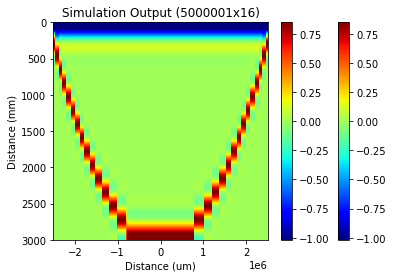

In [4]:
z_step = 0.2
# z_step = 0.1
rounding = 0
medium = Lens.Medium(1.5)
lens.generate_profile(pixel_size=pixel_size)
# plt.plot(lens.profile)
# plt.show()

phase_diff_profile = Simulation.generate_differential_refractive_index_profile(
    lens=lens, z_resolution=z_step, previous_slice=len(lens.profile) * [1.33], output_medium=medium, pixel_size=pixel_size
)

size = 4

utils.plot_simulation(phase_diff_profile, phase_diff_profile.shape[1], phase_diff_profile.shape[0], 
pixel_size, 0, lens.height)

# plt.figure(figsize=(size, size))
# plt.imshow(phase_diff_profile, aspect="auto", interpolation="none", cmap="Blues")
plt.colorbar()
plt.show()

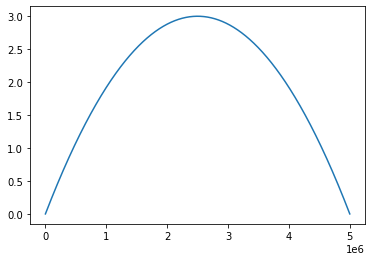

In [3]:
z_step = 0.2
# z_step = 0.1
rounding = 0
medium = Lens.Medium(1.5)
lens.generate_profile(pixel_size=pixel_size)
plt.plot(lens.profile)
plt.show()

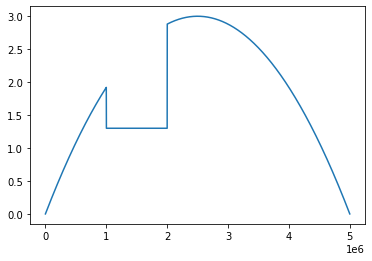

In [4]:
profile = lens.profile
profile[1000000:2000000] = 1.3
plt.plot(profile)


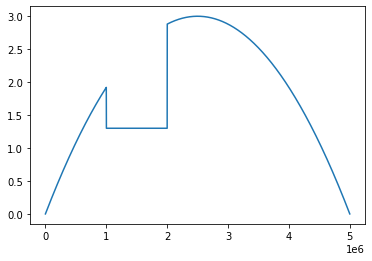

In [12]:
d_profile = Simulation.generate_discrete_profile(lens, 0.5, 1.33, )
plt.imshow()

6


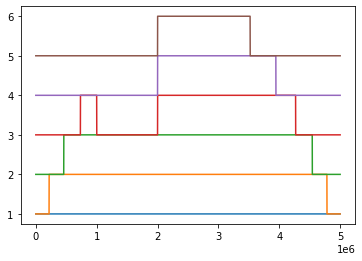

In [7]:
z_resolution = 0.5
n_steps = int(np.ceil(max(lens.profile) / z_resolution))
print(n_steps)

for step in range(n_steps):
    above = profile >= z_resolution * step
    plt.plot(above+2*z_resolution*step)
plt.show() 

6


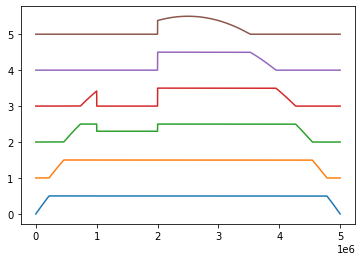

In [10]:
z_resolution = 0.5
n_steps = int(np.ceil(max(lens.profile) / z_resolution))
print(n_steps)

for step in range(n_steps):
    above = profile >= z_resolution * step
    new_profile = profile * above - z_resolution * step
    new_profile[new_profile < 0] = 0 
    new_profile[new_profile >= z_resolution] = z_resolution
    plt.plot(new_profile + 2 * z_resolution * step)